In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Define a linear function to compute the ideal speed-up:

In [3]:
def lin_func (_nn) :
    plot(_nn, _nn, "--k")

Function to process input file

In [4]:
def process_input (_nn, _tt,step=10) :
    nn = numpy.array([])
    tt = numpy.array([])
    te = numpy.array([])
    jj = 10
    for ii in range(10, len(_nn), step) :
        nn = numpy.append(nn, _nn[ii])
        tt = numpy.append(tt, numpy.mean(_tt[ii:ii+step]))
        te = numpy.append(te, numpy.std(_tt[ii:ii+step]))
    return nn, tt, te

Input files:

In [5]:
npart = [108, 2916]
filein_108 = "benchmarking/times_omp_108.txt"
filein_2916 = ""

Plot **strong scaling**:

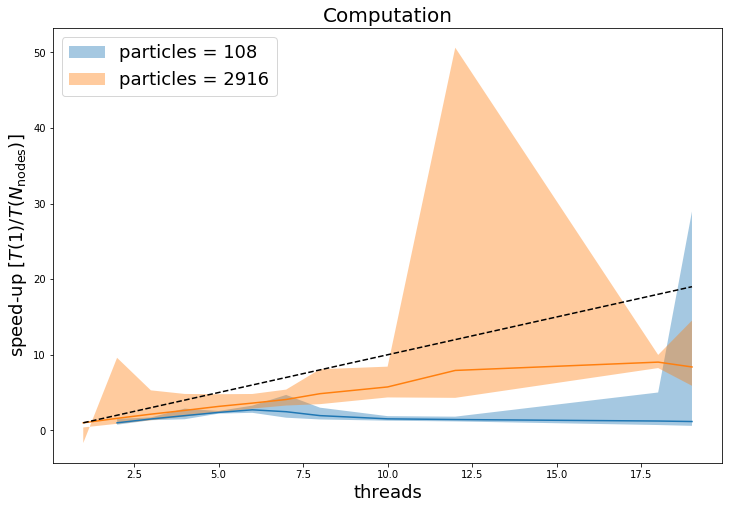

In [7]:
figure(figsize(12,8))
xlabel("threads", fontsize=18)
ylabel("speed-up $[T(1)/T(N_\\mathrm{nodes})]$", fontsize=18)
title("Computation", fontsize=20)

for size in npart :
    file_in = "benchmarking/times_omp_"+str(size)+".dat"
    _nn, _t_comp = numpy.genfromtxt(file_in, usecols=(0,1), unpack=True)
    nn, tt, te = process_input(_nn, _t_comp)
    plot(nn, tt[0]/tt)
    fill_between(nn, tt[0]/(tt-5*te), tt[0]/(tt+5*te), alpha=0.4, label="particles = "+str(size))

legend(loc="upper left", fontsize=18)
lin_func(nn)
savefig("output/strong_scaling_omp.png", bbox_inches='tight')

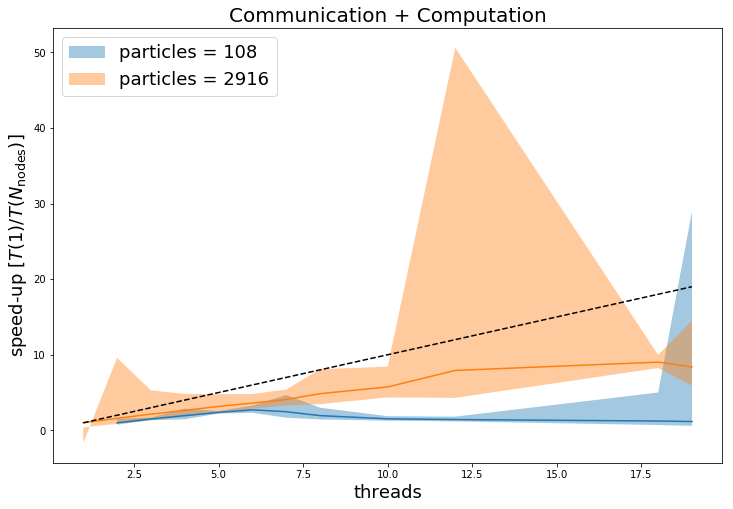

In [11]:
figure(figsize(12,8))
xlabel("threads", fontsize=18)
ylabel("speed-up $[T(1)/T(N_\\mathrm{nodes})]$", fontsize=18)
title("Communication + Computation", fontsize=20)

for size in npart :
    file_in = "benchmarking/times_omp_"+str(size)+".dat"
    _nn, _t_comp = numpy.genfromtxt(file_in, usecols=(0,1), unpack=True)
    nn, tt, te = process_input(_nn, _t_comp)
    plot(nn, tt[0]/tt)
    fill_between(nn, tt[0]/(tt-5*te), tt[0]/(tt+5*te), alpha=0.4, label="particles = "+str(size))

legend(loc="upper left", fontsize=18)
lin_func(nn)
savefig("output/strong_scaling_omp.png", bbox_inches='tight')